<a href="https://colab.research.google.com/github/nilesh5911/ML_Stock_price_prediction-/blob/main/AAPL_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [ ]:
df1=df.reset_index()['adjHigh']
df1

,adjHigh
0,121.880685
1,121.595013
2,121.134251
3,121.078960
4,120.401640
...,...
1253,316.500000
1254,318.520000
1255,319.520000
1256,320.890000


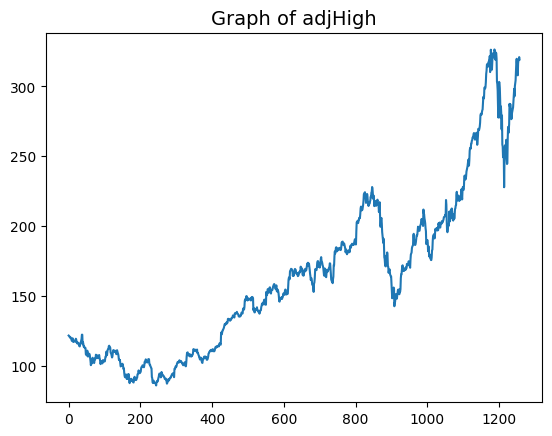

In [ ]:
plot = plt.plot(df1)
plt.title("Graph of adjHigh",fontsize=14)
plt.show()

In [ ]:
df1

,adjHigh
0,121.880685
1,121.595013
2,121.134251
3,121.078960
4,120.401640
...,...
1253,316.500000
1254,318.520000
1255,319.520000
1256,320.890000


In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler to Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.14855432],
       [0.14736478],
       [0.14544615],
       ...,
       [0.97153014],
       [0.97723486],
       [0.97032257]])

In [ ]:
print(df1)

[[0.14855432]
 [0.14736478]
 [0.14544615]
 ...
 [0.97153014]
 [0.97723486]
 [0.97032257]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size


(817, 441)

In [ ]:
train_data
#test_data

array([[0.14855432],
       [0.14736478],
       [0.14544615],
       [0.14521592],
       [0.14239554],
       [0.14348915],
       [0.14210774],
       [0.13869259],
       [0.13685071],
       [0.13251462],
       [0.13734955],
       [0.14057284],
       [0.13347393],
       [0.12929133],
       [0.13163205],
       [0.13174717],
       [0.13339719],
       [0.13151693],
       [0.13243787],
       [0.13071111],
       [0.13911469],
       [0.13681234],
       [0.13216927],
       [0.12633665],
       [0.12499361],
       [0.12814015],
       [0.12718084],
       [0.12541571],
       [0.12510873],
       [0.11931448],
       [0.11708887],
       [0.11628305],
       [0.12359301],
       [0.12595292],
       [0.12894598],
       [0.13439487],
       [0.13842398],
       [0.15127877],
       [0.15108691],
       [0.12261451],
       [0.12871574],
       [0.12353545],
       [0.11536211],
       [0.11651329],
       [0.11494001],
       [0.11137099],
       [0.11164957],
       [0.111

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train)

[[0.14855432 0.14736478 0.14544615 ... 0.07448732 0.07090256 0.07313822]
 [0.14736478 0.14544615 0.14521592 ... 0.07090256 0.07313822 0.07275276]
 [0.14544615 0.14521592 0.14239554 ... 0.07313822 0.07275276 0.07178911]
 ...
 [0.33991987 0.34819661 0.32748456 ... 0.49904924 0.49745485 0.49818697]
 [0.34819661 0.32748456 0.33446933 ... 0.49745485 0.49818697 0.51068219]
 [0.32748456 0.33446933 0.32312413 ... 0.49818697 0.51068219 0.52751236]]


In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.compile(loss='mae',optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - loss: 0.1391 - val_loss: 0.2438
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 0.0486 - val_loss: 0.0468
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step - loss: 0.0244 - val_loss: 0.0407
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - loss: 0.0215 - val_loss: 0.0479
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 0.0176 - val_loss: 0.0555
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - loss: 0.0165 - val_loss: 0.0570
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - loss: 0.0188 - val_loss: 0.0383
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - loss: 0.0174 - val_loss: 0.0563
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - loss: 0.0177 - val_loss: 0.0442
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 0.0178 - val_loss: 0.0335
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 0.0167 - val_loss: 0.0508
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
math.sqrt(mean_squared_error(y_train,train_predict))


139.25716982515019

In [ ]:
mse = model.evaluate(X_train, y_train)
print(f'Test MSE: {mse:.2f}')

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0079
Test MSE: 0.01


In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

241.13716111115173

In [ ]:
mse = model.evaluate(X_test, ytest)
print(f'Test MSE: {mse:.2f}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0156
Test MSE: 0.02


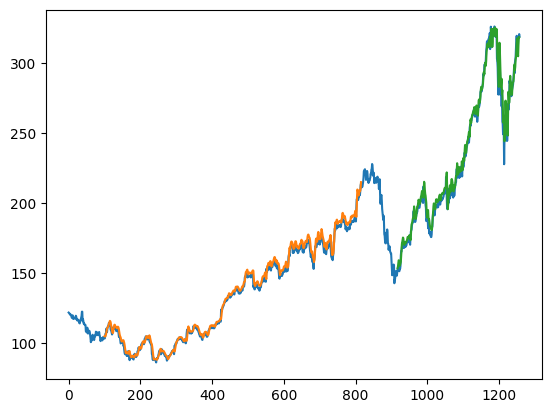

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8577792644276716,
 0.8864493756739282,
 0.8863665140807611,
 0.8837978046913291,
 0.8876922995718524,
 0.9023583872594754,
 0.9271758487301744,
 0.9364563471682306,
 0.9546858976712578,
 0.9567574375012702,
 0.9481812626055515,
 0.9490098785372234,
 0.9616048407032163,
 0.9627649030079732,
 0.9667836902782474,
 0.96500216602432,
 0.9806215763421644,
 0.9327275754740416,
 0.9601961936189576,
 0.999348296404611,
 0.9837703168833503,
 0.9779285745629815,
 0.9398536724893345,
 0.9653336123969887,
 0.9865461802557003,
 0.988451996898962,
 0.9841353565986288,
 0.9764522177789832,
 0.9862118806042421,
 1.0,
 0.9958469519891895,
 0.9948502204666949,
 0.9689767313594408,
 0.9889944227712064,
 0.9893266666120379,
 0.9718838649671333,
 0.9043137738321905,
 0.897461244614624,
 0.8781495713646255,
 0.8288113609969789,
 0.7972897265955889,
 0.8929344222828779,
 0.9035662251903198,
 0.9010743963840833,
 0.8850851615424,
 0.8488290524087443,
 0.7959607512322626,
 0.8306387021219688,
 0.808959791505

In [ ]:
#demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9653095]
101
1 day input [0.88644938 0.88636651 0.8837978  0.8876923  0.90235839 0.92717585
 0.93645635 0.9546859  0.95675744 0.94818126 0.94900988 0.96160484
 0.9627649  0.96678369 0.96500217 0.98062158 0.93272758 0.96019619
 0.9993483  0.98377032 0.97792857 0.93985367 0.96533361 0.98654618
 0.988452   0.98413536 0.97645222 0.98621188 1.         0.99584695
 0.99485022 0.96897673 0.98899442 0.98932667 0.97188386 0.90431377
 0.89746124 0.87814957 0.82881136 0.79728973 0.89293442 0.90356623
 0.9010744  0.88508516 0.84882905 0.79596075 0.8306387  0.80895979
 0.76236259 0.80356083 0.71701131 0.71090633 0.67930163 0.69109629
 0.68690171 0.59000985 0.66970809 0.71356428 0.71535009 0.70368002
 0.70222646 0.7311732  0.67398573 0.65915935 0.66144353 0.73374809
 0.76942277 0.75144008 0.76265331 0.77772887 0.83815572 0.83018187
 0.83793768 0.83273599 0.81087019 0.79247219 0.79517167 0.81116091
 0.81639375 0.82274791 0.82810534 0.84405305 0.86423686 0.88280099
 0.8607483  0.89110708 0.90040991 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

1258

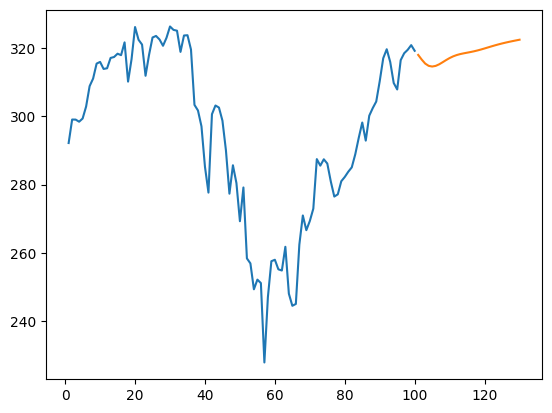

In [ ]:
import matplotlib.pyplot as plt

plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

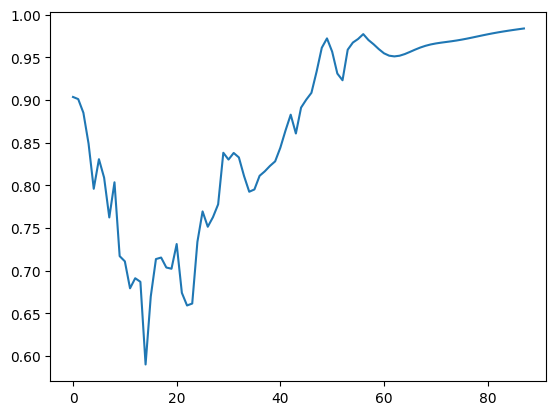

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

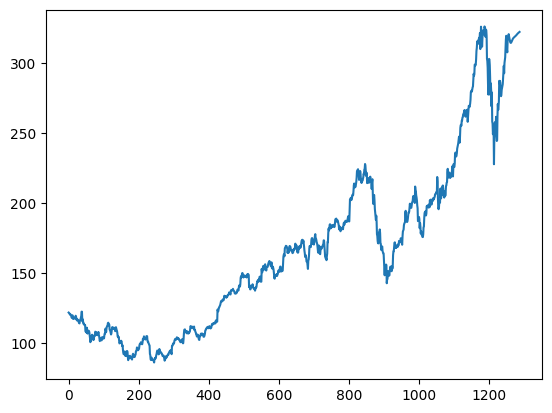

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


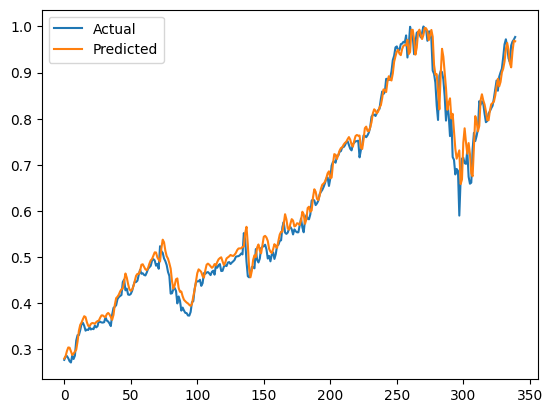

In [ ]:
predicted_values = model.predict(X_test)
import matplotlib.pyplot as plt
plt.plot(ytest)
plt.plot(predicted_values)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

def create_dilated_cnn_model(input_shape):

  model = Sequential()

  # Dilated Convolutional Layers
  model.add(Conv1D(filters=32, kernel_size=3, dilation_rate=1, activation='relu', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(Conv1D(filters=64, kernel_size=3, dilation_rate=2, activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv1D(filters=128, kernel_size=3, dilation_rate=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.2))

  # LSTM Layer
  model.add(LSTM(units=50, return_sequences=False))
  model.add(Dropout(0.2))

  # Output Layer
  model.add(Dense(1))

  model.compile(loss='mae', optimizer='adam')
  return model

def create_cnn_lstm_model(input_shape):
  model = Sequential()

  # Convolutional Layers
  model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.2))

  # LSTM Layer
  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  # Output Layer
  model.add(Dense(1))

  model.compile(loss='mae', optimizer='adam')
  return model

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Assuming your data is prepared and split into X_train, y_train, X_test, ytest
input_shape = (X_train.shape[1], X_train.shape[2])

# Create and train the Dilated CNN model
dilated_cnn_model = create_dilated_cnn_model(input_shape)
dilated_cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, ytest), callbacks=[early_stopping])

# Create and train the CNN-LSTM model
cnn_lstm_model = create_cnn_lstm_model(input_shape)
cnn_lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, ytest), callbacks=[early_stopping])

# Evaluate the models
dilated_cnn_loss = dilated_cnn_model.evaluate(X_test, ytest)
cnn_lstm_loss = cnn_lstm_model.evaluate(X_test, ytest)

print("Dilated CNN Loss:", dilated_cnn_loss)
print("CNN-LSTM Loss:", cnn_lstm_loss)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.3216 - val_loss: 0.4744
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.2251 - val_loss: 0.4060
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.2034 - val_loss: 0.3847
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.1624 - val_loss: 0.3683
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.1670 - val_loss: 0.4693
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.1131 - val_loss: 0.4035
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.1083 - val_loss: 0.3765
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0987 - val_loss: 0.4335
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0805 - val_loss: 0.4896
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0677 - val_loss: 0.4821
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0618 - val_loss: 0.4098
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step